In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/The sparks foundation /Iris.csv" , encoding= "utf-8")

In [ ]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data = data.drop("Species" , axis = 1)

In [ ]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [ ]:
data = data.drop("Id" , axis = 1)

In [ ]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## finding optimal number for number of clusters

Cost_Function= 680.8244000000001 with 1 Clusters
Cost_Function= 152.36870647733906 with 2 Clusters
Cost_Function= 78.940841426146 with 3 Clusters
Cost_Function= 57.317873214285704 with 4 Clusters
Cost_Function= 46.53558205128205 with 5 Clusters
Cost_Function= 38.930963049671746 with 6 Clusters
Cost_Function= 34.598978434287126 with 7 Clusters
Cost_Function= 30.085307692307694 with 8 Clusters
Cost_Function= 28.06327473272553 with 9 Clusters
Cost_Function= 26.587316820410805 with 10 Clusters
Cost_Function= 24.63877272727273 with 11 Clusters
Cost_Function= 22.835628405907816 with 12 Clusters
Cost_Function= 21.427404450941218 with 13 Clusters
Cost_Function= 20.047162545787547 with 14 Clusters
Cost_Function= 18.606107892107897 with 15 Clusters
Cost_Function= 18.148869047619048 with 16 Clusters
Cost_Function= 16.87511446886447 with 17 Clusters
Cost_Function= 16.12347366522367 with 18 Clusters
Cost_Function= 15.641598124098127 with 19 Clusters


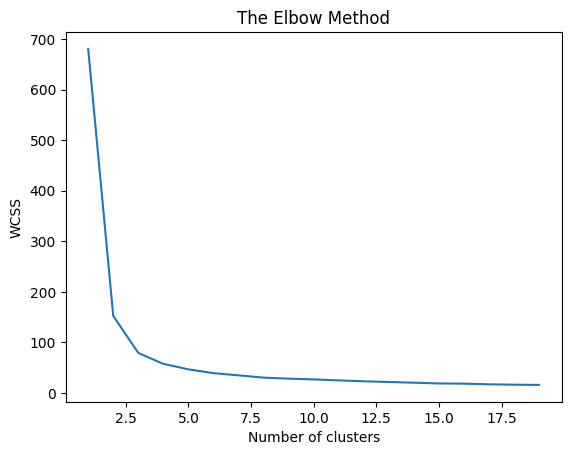

In [ ]:
from sklearn.cluster import KMeans
wcss = []            ## total distances from the centeriods
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42, n_init=10)
    kmeans.fit(data)
    print('Cost_Function=',kmeans.inertia_,'with', i, 'Clusters')
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### the optimal is 5

In [ ]:
x = data.values

## Applying KNN

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
y_kmeans= pd.Series(y_kmeans)

In [ ]:
y_kmeans

0      1
1      1
2      1
3      1
4      1
      ..
145    2
146    0
147    2
148    2
149    0
Length: 150, dtype: int32

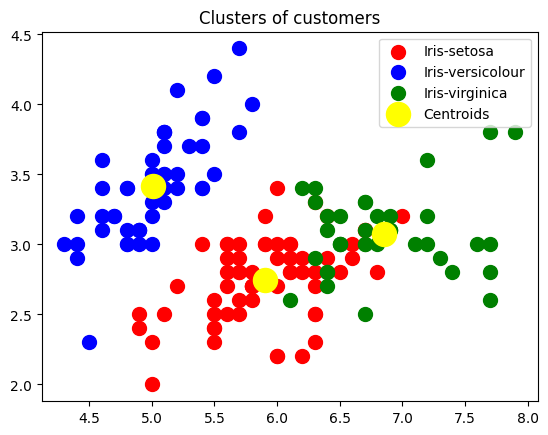

In [ ]:
plt.scatter(x[y_kmeans == 0,0 ], x[y_kmeans == 0,1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1], s = 100, c = 'green', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters of customers')
plt.legend()
plt.show()

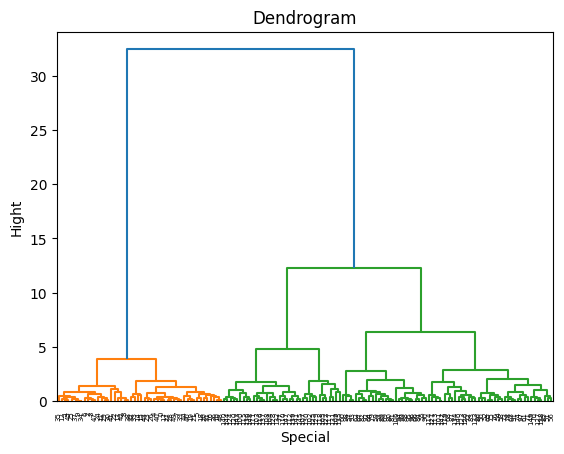

In [ ]:
import scipy.cluster.hierarchy as sch
dendrogrm = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Special')
plt.ylabel('Hight')
plt.show()